In [1]:
# import libraries 
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

%matplotlib inline

In [2]:
# load the data 

sample_data_folder = '/Users/christinadelta/datasets/eeg_testing_data'
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

# raw.crop(0, 60).load_data() # we'll use the 60 sec of the data for now and load to memory

# load events
events_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                       'sample_audvis_raw-eve.fif')
events = mne.read_events(events_file)

Opening raw data file /Users/christinadelta/datasets/eeg_testing_data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


### EOG and ECG artefact repair

First visualise the artifacts to repair 

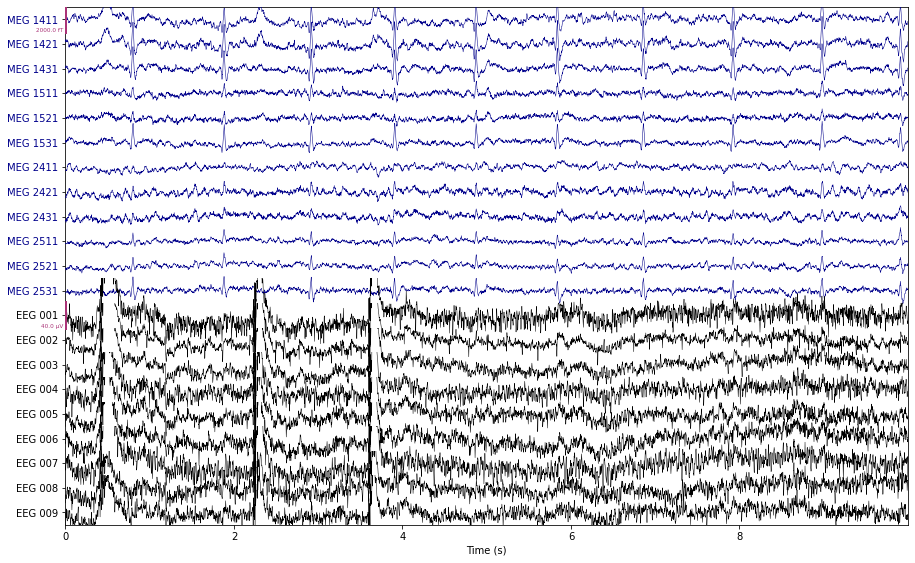

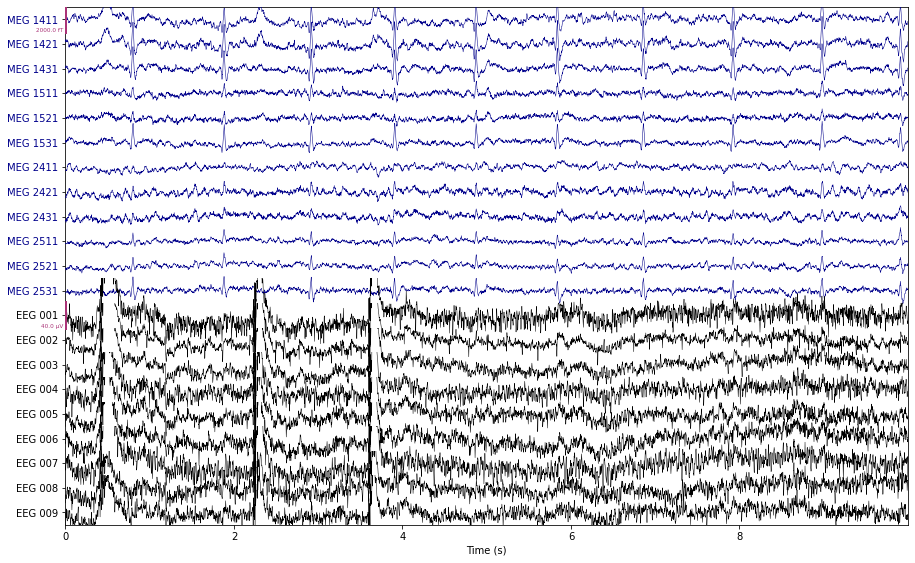

In [3]:
# pick some channels that clearly show heartbeats and blinks
regexp = r'(MEG [12][45][123]1|EEG 00.)'
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks),
         show_scrollbars=False)

In [6]:
# filter ro remove slow drifts

AttributeError: module 'mne' has no attribute 'create_eog_epochs'